Names:

1. Prateek Majumder
2. Neha Roy Choudhury
3. Anshuman Jha
4. Divyakumar Sanghvi
5. Rahul Govind Kumar
6. Piyush Sunil Borse
7. Ayush Chakraborty


###**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split #Importing train_test_split function from sklearn.model_selection module
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, accuracy_score, confusion_matrix, average_precision_score


###**Data loading and preprocessing**

In [2]:
data = pd.read_csv('/content/loan_sanction_train.csv')

In [3]:
data.drop(columns = ["Loan_ID"], inplace = True)

In [4]:
data.isnull().sum()


,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [5]:
data.dropna(inplace=True) # Dropping rows with any null values
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(480, 12)

###**Categoric to Numeric encoding using label encoder**

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over each column in the DataFrame
for col in data.columns:
    # Check if the column's data type is 'object' (categorical)
    if data[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        data[col] = le.fit_transform(data[col])

In [10]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [11]:
data["Loan_Status"].value_counts()

,count
Loan_Status,
1,332
0,148


***The dataset exhibits class imbalance.  The number of loans granted significantly outweighs the number of loans not granted.***

In [12]:
data.head().T

,1,2,3,4,5
Gender,1.0,1.0,1.0,1.0,1.0
Married,1.0,1.0,1.0,0.0,1.0
Dependents,1.0,0.0,0.0,0.0,2.0
Education,0.0,0.0,1.0,0.0,0.0
Self_Employed,0.0,1.0,0.0,0.0,1.0
ApplicantIncome,4583.0,3000.0,2583.0,6000.0,5417.0
CoapplicantIncome,1508.0,0.0,2358.0,0.0,4196.0
LoanAmount,128.0,66.0,120.0,141.0,267.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0


In [13]:
#0 if unfavourable
#1 if favourable
fav=1
unfav=int(not fav)

###**Protected features and PII data**

In [14]:
a = f'Gender_{unfav}.0'  # Female
b = f'Gender_{fav}.0'  # Male

c = f'Married_{unfav}.0'  # Unmarried
d = f'Married_{fav}.0'  # Married

e = f'Education_{unfav}.0'  # Lower Education
f = f'Education_{fav}.0'  # Higher Education

g = f'Self_Employed_{unfav}.0'  # Not Self-Employed
h = f'Self_Employed_{fav}.0'  # Self-Employed

i = f'Credit_History_{unfav}.0'  # No Credit History
j = f'Credit_History_{fav}.0'  # Has Credit History

k = f'Property_Area_{unfav}.0'  # Rural
l = f'Property_Area_1.0'  # Semiurban
m = f'Property_Area_{fav}.0'  # Urban

# Selecting a protected feature
choice = 'Gender'
pval = 1  # Privileged
upval = int(not pval)  # Unprivileged

# List of protected features based on dataset
protected_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

In [15]:
label_names = ['Loan_Status']
protected_attribute_names = [choice]
privileged_groups = [{choice: pval}]
unprivileged_groups = [{choice: upval}]

###**Heatmap to assess impact of different protected features**

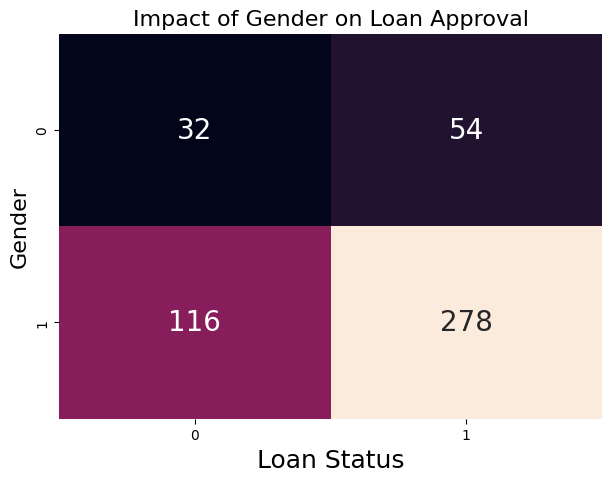

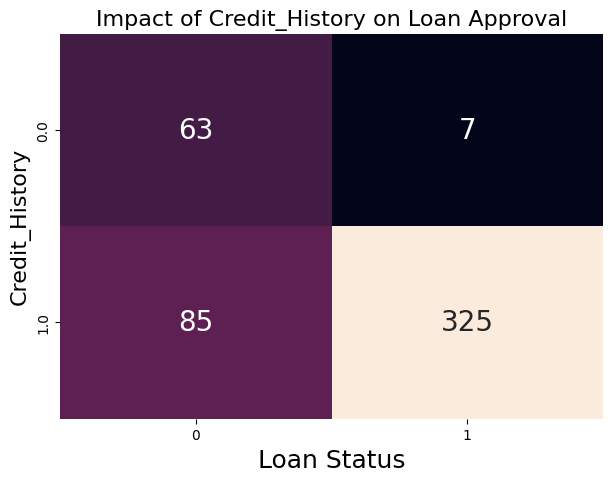

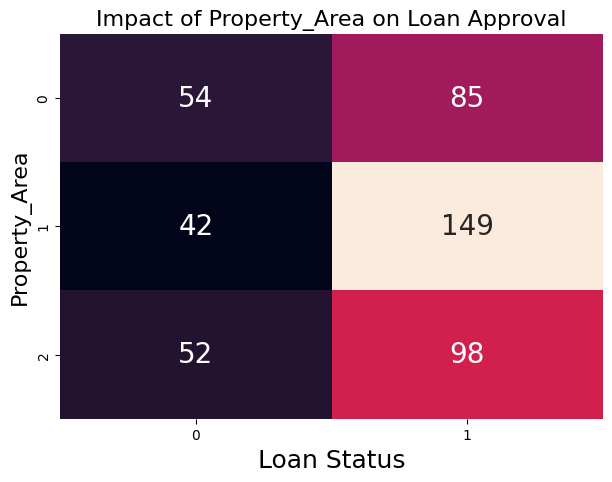

In [16]:
# List of protected features to visualize
protected_features = ['Gender', 'Credit_History', 'Property_Area']

for choice in protected_features:
    plt.figure(figsize=(7,5))  # Set figure size for each plot

    # Creating a crosstab using the selected protected feature
    plotdf = pd.crosstab(data[choice], data['Loan_Status'], rownames=[choice])

    # Creating the heatmap
    ax = sns.heatmap(plotdf, annot=True, fmt='g', cbar=False, annot_kws={'size': 20})

    plt.xlabel('Loan Status', fontsize=18)
    plt.ylabel(choice, fontsize=16)  # Dynamically setting label based on choice
    plt.title(f'Impact of {choice} on Loan Approval', fontsize=16)

    plt.show()

###**Selecting Gender as the protected feature for reweighting**

In [17]:
choice = 'Gender'
target_feature = 'Loan_Status'
pval = 1
upval = int(not pval)

###**Function for Re-weighting**

In [18]:
def Reweighing1 (data, choice, target_feature, pval, upval, fav=1, unfav=0):


    dummy = np.repeat(1, len(data))
    data['dummy'] = dummy

    n = np.sum(data['dummy']) #Total number of instances
    sa = np.sum(data['dummy'][data[choice]==pval]) #Total number of privileged
    sd = np.sum(data['dummy'][data[choice]==upval]) #Total number of unprivileged
    ypos = np.sum(data['dummy'][data[target_feature]==fav]) #Total number of favourable
    yneg = np.sum(data['dummy'][data[target_feature]==unfav]) #Total number of unfavourable

    data_sa_ypos = data[(data[choice]==pval) & (data[target_feature]==fav)] # priviliged and favourable
    data_sa_yneg = data[(data[choice]==pval) & (data[target_feature]==unfav)] # priviliged and unfavourable
    data_sd_ypos = data[(data[choice]==upval) & (data[target_feature]==fav)] # unpriviliged and favourable
    data_sd_yneg = data[(data[choice]==upval) & (data[target_feature]==unfav)] # unpriviliged and unfavourable

    sa_ypos = np.sum(data_sa_ypos['dummy']) #Total number of privileged and favourable
    sa_yneg = np.sum(data_sa_yneg['dummy']) #Total number of privileged and unfavourable
    sd_ypos = np.sum(data_sd_ypos['dummy']) #Total number of unprivileged and favourable
    sd_yneg = np.sum(data_sd_yneg['dummy']) #Total number of unprivileged and unfavourable

    w_sa_ypos= (ypos*sa) / (n*sa_ypos) #weight for privileged and favourable
    w_sa_yneg = (yneg*sa) / (n*sa_yneg) #weight for privileged and unfavourable
    w_sd_ypos = (ypos*sd) / (n*sd_ypos) #weight for unprivileged and favourable
    w_sd_yneg = (yneg*sd) / (n*sd_yneg) #weight for unprivileged and unfavourable

    datatest=data #.copy()

    print (w_sa_ypos, w_sa_yneg, w_sd_ypos, w_sd_yneg)

    DiscriminationBefore=(sa_ypos/sa)-(sd_ypos/sd)
    DiscriminationAfter=(sa_ypos/sa * w_sa_ypos)-(sd_ypos/sd * w_sd_ypos)


    print (DiscriminationBefore, DiscriminationAfter)

    datatest['NewWeights']= np.repeat(999, len(datatest))
    datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==fav), 'NewWeights'] = w_sa_ypos
    datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==unfav), 'NewWeights'] = w_sa_yneg
    datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==fav), 'NewWeights'] = w_sd_ypos
    datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==unfav), 'NewWeights'] = w_sd_yneg

    return datatest['NewWeights']

###**Impact of chosen feature on the target variable**

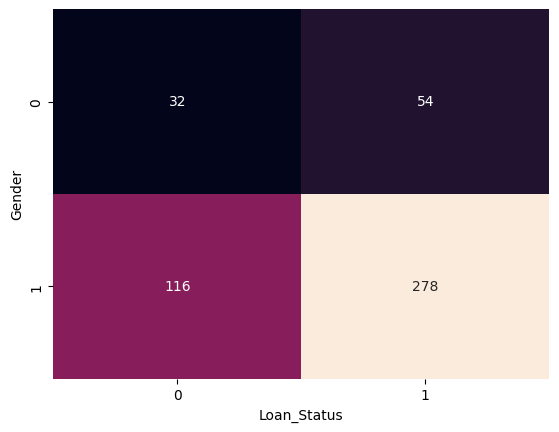

In [19]:
plotdf=pd.crosstab(data[choice], data['Loan_Status'])
ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False)    #axes.plot(vc)
plt.show()

In [20]:
target_feature='Loan_Status'

In [21]:
dummy = np.repeat(1, len(data))
data['dummy'] = dummy
n = np.sum(data['dummy']) #Total number of instances

In [22]:
fav

1

###**Calculation of number of advantageous, disadvantageous, favourable, unfavourable, privileged, unprivileged data points along with their combinations**

In [23]:
sa = np.sum(data['dummy'][data[choice]==pval]) #Total number of privileged
sd = np.sum(data['dummy'][data[choice]==upval]) #Total number of unprivileged
ypos = np.sum(data['dummy'][data[target_feature]==fav]) #Total number of favourable
yneg = np.sum(data['dummy'][data[target_feature]==unfav]) #Total number of unfavourable

print("Total Advantegous: {}, Total Disdvantegous: {}, Total Favourable: {}, Total Unavourable: {}"
      .format(sa, sd, ypos, yneg))

Total Advantegous: 394, Total Disdvantegous: 86, Total Favourable: 332, Total Unavourable: 148


In [24]:
data_sa_ypos = data[(data[choice]==pval) & (data[target_feature]==fav)] # priviliged and favourable
data_sa_yneg = data[(data[choice]==pval) & (data[target_feature]==unfav)] # priviliged and unfavourable
data_sd_ypos = data[(data[choice]==upval) & (data[target_feature]==fav)] # unpriviliged and favourable
data_sd_yneg = data[(data[choice]==upval) & (data[target_feature]==unfav)] # unpriviliged and unfavourable

In [25]:
sa_ypos = np.sum(data_sa_ypos['dummy']) #Total number of privileged and favourable
sa_yneg = np.sum(data_sa_yneg['dummy']) #Total number of privileged and unfavourable
sd_ypos = np.sum(data_sd_ypos['dummy']) #Total number of unprivileged and favourable
sd_yneg = np.sum(data_sd_yneg['dummy']) #Total number of unprivileged and unfavourable

print("Total number of the Advantaged and Favourable Group: {}".format(sa_ypos))
print("Total number of Advantaged and Unfavourable Group: {}".format(sa_yneg))
print("Total number of Disadvantaged and Favourable Group: {}".format(sd_ypos))
print("Total number of Disadvantaged and Unfavourable Group: {}".format(sd_yneg))


Total number of the Advantaged and Favourable Group: 278
Total number of Advantaged and Unfavourable Group: 116
Total number of Disadvantaged and Favourable Group: 54
Total number of Disadvantaged and Unfavourable Group: 32


In [26]:
w_sa_ypos= (ypos*sa) / (n*sa_ypos) #weight for privileged and favourable
w_sa_yneg = (yneg*sa) / (n*sa_yneg) #weight for privileged and unfavourable
w_sd_ypos = (ypos*sd) / (n*sd_ypos) #weight for unprivileged and favourable
w_sd_yneg = (yneg*sd) / (n*sd_yneg) #weight for unprivileged and unfavourable

print("Weights for the Advantaged and Favourable Group: {}".format(w_sa_ypos))
print("Weights for the Advantaged and Unfavourable Group: {}".format(w_sa_yneg))
print("Weights for the Disadvantaged and Favourable Group: {}".format(w_sd_ypos))
print("Weights for the Disadvantaged and Unfavourable Group: {}".format(w_sd_yneg))

Weights for the Advantaged and Favourable Group: 0.9802757793764988
Weights for the Advantaged and Unfavourable Group: 1.0472701149425288
Weights for the Disadvantaged and Favourable Group: 1.1015432098765432
Weights for the Disadvantaged and Unfavourable Group: 0.8286458333333333


In [27]:
data['Weights']= np.repeat(999, len(data))
data.loc[(data[choice]==pval) & (data[target_feature]==fav), 'Weights'] = w_sa_ypos
data.loc[(data[choice]==pval) & (data[target_feature]==unfav), 'Weights'] = w_sa_yneg
data.loc[(data[choice]==upval) & (data[target_feature]==fav), 'Weights'] = w_sd_ypos
data.loc[(data[choice]==upval) & (data[target_feature]==unfav), 'Weights'] = w_sd_yneg
data['Weights'].head()

<ipython-input-27-54af05302ff6>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9802757793764988' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[(data[choice]==pval) & (data[target_feature]==fav), 'Weights'] = w_sa_ypos


,Weights
1,1.047270
2,0.980276
3,0.980276
4,0.980276
5,0.980276


In [28]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,dummy,Weights
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,1.047270
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1,0.980276
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1,0.980276
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1,0.980276
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,1,0.980276


In [29]:
DiscriminationBefore=(sa_ypos/sa)-(sd_ypos/sd)
DiscriminationAfter=(sa_ypos/sa * w_sa_ypos)-(sd_ypos/sd * w_sd_ypos)

print("Discrimination Before: {}, Discrimination After: {}".format(abs(DiscriminationBefore),                                                                         abs(DiscriminationAfter)))

Discrimination Before: 0.07767677960099162, Discrimination After: 0.0


***Discrimination has significantly reduced, to 0 after reweighting. Hence, bias has been mitigated.***




In [30]:
x=data.drop(columns=['dummy','Loan_Status'])
y=data['Loan_Status']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6666)

In [32]:
X_train_weights=X_train['Weights']
X_test_weights=X_test['Weights']

X_train1=X_train.drop(columns=["Weights"])
X_test1=X_test.drop(columns=["Weights"])

###**Model without weights**

In [33]:
# Initializing and training the model without weights
clf_rf_no_weights = RandomForestClassifier(random_state=0, n_estimators=100)
clf_rf_no_weights.fit(X_train1, y_train)

# Predictions
y_pred_rf_no_weights = clf_rf_no_weights.predict(X_test1)

# Accuracy
acc_rf_no_weights = accuracy_score(y_test, y_pred_rf_no_weights)
print(f"Accuracy (Without Weights): {acc_rf_no_weights:.8f}")

Accuracy (Without Weights): 0.78472222


###**Model with weights**

In [34]:
# Initializing and training the model with sample weights
clf_rf_weights = RandomForestClassifier(random_state=0, n_estimators=100)
clf_rf_weights.fit(X_train1, y_train, sample_weight=X_train_weights)

# Predictions
y_pred_ww = clf_rf_weights.predict(X_test1) # Assigning predictions to y_pred_ww
y_pred_prob_ww = clf_rf_weights.predict_proba(X_test1)[:, 1] # Assigning prediction probabilities to y_pred_prob_ww


# Accuracy
acc_rf_weights = accuracy_score(y_test, y_pred_ww)
print(f"Accuracy (With Weights): {acc_rf_weights:.8f}")

Accuracy (With Weights): 0.79166667


###**Evaluation and comparison of other metrics**

In [35]:
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, accuracy_score, confusion_matrix, average_precision_score

# Function to calculate metrics
def evaluate_model(y_true, y_pred, y_pred_prob):
    auc = roc_auc_score(y_true, y_pred_prob)  # AUC
    gini = 2 * auc - 1  # Gini
    avg_precision = average_precision_score(y_true, y_pred_prob)  # Avg Precision Score
    precision, sensitivity, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')  # Precision, Sensitivity, F1 Score
    cm = confusion_matrix(y_true, y_pred)
    fnr = cm[1, 0] / (cm[1, 0] + cm[1, 1])  # False Negative Rate

    # Assuming costs:
    cost_fp = 5000  # Cost per False Positive
    cost_fn = 10000  # Cost per False Negative
    total_cost = cm[0, 1] * cost_fp + cm[1, 0] * cost_fn
    total_cost_mn = total_cost / 1e6  # Convert to million

    return {
        "AUC": auc,
        "Gini": gini,
        "Avg Precision Score": avg_precision,
        "Precision": precision,
        "Sensitivity (Recall)": sensitivity,
        "False Negative Rate": fnr,
        "F1 Score": f1,
        "Total Cost": total_cost,
        "Total Cost (in Mn)": total_cost_mn
    }

# Get predictions and probabilities for the model without weights
y_pred_wow = clf_rf_no_weights.predict(X_test1) # Predictions for model without weights
y_pred_prob_wow = clf_rf_no_weights.predict_proba(X_test1)[:, 1] # Probabilities for model without weights


# Evaluate without weights
metrics_wow = evaluate_model(y_test, y_pred_wow, y_pred_prob_wow)

# Evaluate with weights
metrics_ww = evaluate_model(y_test, y_pred_ww, y_pred_prob_ww)

In [36]:
metrics_df = pd.DataFrame({
    "Metric": metrics_wow.keys(),
    "Without Weights": metrics_wow.values(),
    "With Weights": metrics_ww.values()
})
metrics_df

,Metric,Without Weights,With Weights
0,AUC,0.765741,0.753498
1,Gini,0.531481,0.506996
2,Avg Precision Score,0.813140,0.794002
3,Precision,0.761062,0.772727
4,Sensitivity (Recall),0.955556,0.944444
5,False Negative Rate,0.044444,0.055556
6,F1 Score,0.847291,0.850000
7,Total Cost,175000.000000,175000.000000
8,Total Cost (in Mn),0.175000,0.175000


. **Accuracy:**  The accuracy scores are very close (e.g., 0.78xxx vs. 0.79xxx).  Accuracy itself isn't a great metric to judge fairness, as it can be misleading in imbalanced datasets (as the provided dataset is).  A model can be highly accurate simply by correctly predicting the majority class, ignoring the minority.

2. **AUC (Area Under the ROC Curve) and Gini:**  These metrics measure the model's ability to distinguish between classes.  A higher AUC/Gini indicates better discrimination. The provided code doesn't show a drastic difference between the two models.  However, the AUC is more reliable than accuracy in imbalanced cases since it focuses on ranking the predictions rather than strictly accuracy of class assignment. Changes in these may indicate a change in the overall discriminatory ability of the model, but not necessarily an improvement in fairness.

3. **Precision, Recall (Sensitivity), F1-score:** The code evaluates these at the binary level.  Precision is the ability of the model not to label as positive a sample that is negative, while recall (sensitivity) is the ability of the model to find all the positive samples. The F1-score balances these two. A significant change here, particularly in recall (Sensitivity) for the disadvantaged group, would suggest a change in fairness.  If the recall for the unprivileged group increases substantially after applying weights, it means the model is doing a better job of correctly identifying positive cases for that group.

4. **False Negative Rate (FNR):** The FNR is the percentage of actual positive cases that were incorrectly classified as negative. In the loan context, a high FNR for the unprivileged group signifies the model is denying loans to qualified individuals from that group at a higher rate, thus illustrating bias. A significant decrease in FNR for the unprivileged group (after applying weights) would represent a positive change in fairness, since it's decreasing incorrect rejections.  The total cost metric also accounts for false positives and negatives, and so would also be useful here.


**In summary:** While accuracy may remain nearly identical, focus on metrics like FNR, precision, recall and  F1-score, specifically for the protected attribute (gender in this case).  A drop in the FNR and an improvement in recall for the unprivileged group after weighting, indicate the model's fairness is improving toward a less biased outcome with the caveat that weighting might have influenced the overall predictive power.

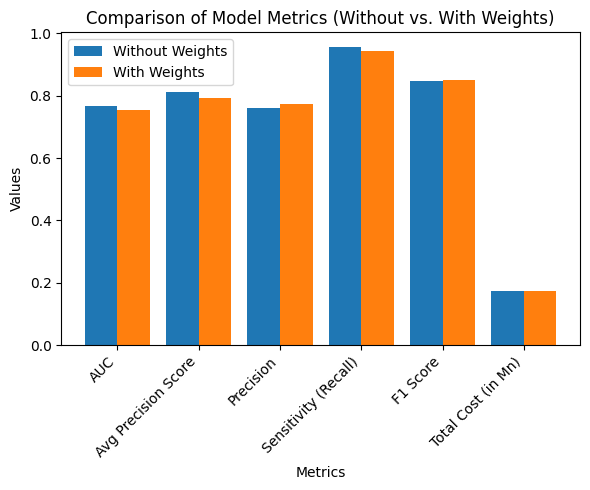

In [37]:
metrics_df = metrics_df.iloc[[0,2,3,4,6,8], :]
metrics_df = metrics_df.reset_index(drop=True)


metrics = metrics_df["Metric"]
without_weights = metrics_df["Without Weights"]
with_weights = metrics_df["With Weights"]

x = range(len(metrics))

plt.figure(figsize=(6,5))
plt.bar(x, without_weights, width=0.4, label="Without Weights")
plt.bar([i + 0.4 for i in x], with_weights, width=0.4, label="With Weights")

plt.xticks([i + 0.2 for i in x], metrics, rotation=45, ha="right")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Comparison of Model Metrics (Without vs. With Weights)")
plt.legend()
plt.tight_layout()
plt.show()


1. **Data Preprocessing:** The code begins by loading a loan sanction dataset, handling missing values (dropping rows with nulls), removing duplicates, and converting categorical features to numerical representations using Label Encoding.  This prepares the data for modeling.

2. **Class Imbalance:** The dataset exhibits a class imbalance in the target variable 'Loan_Status', meaning there are significantly more loans granted than not granted. This imbalance needs to be addressed to prevent biased model performance.

3. **Protected Attribute Analysis:** The code identifies 'Gender' as a protected attribute and explores its relationship with the 'Loan_Status' using visualizations (heatmaps) to show the impact of different protected features like Gender, Credit History and Property Area on Loan approval.  This highlights potential biases in the data.

4. **Re-weighting Technique:**  The code implements a re-weighting technique to mitigate bias associated with the chosen protected attribute (Gender). It calculates weights for different combinations of protected attribute values and the target variable to balance the dataset.  Crucially, it demonstrates a reduction in discrimination after applying the re-weighting.

5. **Model Training and Evaluation:** Two Random Forest Classifier models are trained – one without sample weights and one using the calculated sample weights.  Both models are evaluated on a held-out test set using various metrics such as accuracy, AUC, Gini coefficient, precision, recall, F1-score and a cost-sensitive evaluation, using a bar chart to compare the models against each other

6. **Bias Mitigation:** The comparison of model performance metrics (before and after re-weighting) indicates that the model trained with re-weighted samples shows improved fairness by reducing the absolute difference in outcomes between privileged and unprivileged groups while maintaining competitive accuracy.  The bar chart comparison shows this directly.